In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style = 'white', font_scale = 1)
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dissertation/ukhpi-comparison-all-hpi-bradford-from-2013-01-01-to-2029-01-01.csv')

In [ ]:
df.head(10)

,Name,URI,Region GSS code,Period,Sales volume,Reporting period,House price index All property types,Pivotable date
0,Bradford,http://landregistry.data.gov.uk/id/region/brad...,E08000032,2013-01,301.0,monthly,93.48,01-01-13
1,Calderdale,http://landregistry.data.gov.uk/id/region/cald...,E08000033,2013-01,141.0,monthly,92.30,01-01-13
2,Leeds,http://landregistry.data.gov.uk/id/region/leeds,E08000035,2013-01,525.0,monthly,91.71,01-01-13
3,West Yorkshire,http://landregistry.data.gov.uk/id/region/west...,E11000006,2013-01,1387.0,monthly,92.92,01-01-13
4,Bradford,http://landregistry.data.gov.uk/id/region/brad...,E08000032,2013-02,353.0,monthly,93.05,01-02-13
5,Calderdale,http://landregistry.data.gov.uk/id/region/cald...,E08000033,2013-02,150.0,monthly,90.08,01-02-13
6,Leeds,http://landregistry.data.gov.uk/id/region/leeds,E08000035,2013-02,566.0,monthly,92.31,01-02-13
7,West Yorkshire,http://landregistry.data.gov.uk/id/region/west...,E11000006,2013-02,1576.0,monthly,92.33,01-02-13
8,Bradford,http://landregistry.data.gov.uk/id/region/brad...,E08000032,2013-03,410.0,monthly,93.15,01-03-13
9,Calderdale,http://landregistry.data.gov.uk/id/region/cald...,E08000033,2013-03,203.0,monthly,88.86,01-03-13


In [ ]:
# check dataset meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Name                                  524 non-null    object 
 1   URI                                   524 non-null    object 
 2   Region GSS code                       524 non-null    object 
 3   Period                                524 non-null    object 
 4   Sales volume                          516 non-null    float64
 5   Reporting period                      524 non-null    object 
 6   House price index All property types  524 non-null    float64
 7   Pivotable date                        524 non-null    object 
dtypes: float64(2), object(6)
memory usage: 32.9+ KB


In [ ]:
df.describe()


,Sales volume,House price index All property types
count,516.000000,524.000000
mean,1129.544574,118.501889
std,999.376633,18.426182
min,97.000000,88.860000
25%,352.250000,104.427500
50%,702.500000,115.035000
75%,1528.750000,132.380000
max,4664.000000,165.100000


In [ ]:
df_null = round(100 *(df.isna().sum()/df.shape[0]).sort_values(ascending = False) ,2)
df_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Sales volume,1.53
Name,0.00
URI,0.00
Region GSS code,0.00
Period,0.00
Reporting period,0.00
House price index All property types,0.00
Pivotable date,0.00


In [ ]:
# Drop URI column
df_clean = df.drop(columns = ['URI'])

In [ ]:
df_clean_filled = df_clean.fillna(df_clean.mean())


In [ ]:
# Check NULL again
null = round(100 *(df_clean.isna().sum()/df_clean.shape[0]).sort_values(ascending = False) ,2)
null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Sales volume,1.53
Name,0.00
Region GSS code,0.00
Period,0.00
Reporting period,0.00
House price index All property types,0.00
Pivotable date,0.00


In [ ]:
# What are Name boroughs ?
boroughs = df_clean['Name'].unique()
print(boroughs)


['Bradford' 'Calderdale' 'Leeds' 'West Yorkshire']


In [ ]:

# Create a box plot for 'Sales volume'
fig = px.box(df_clean, y='Sales volume', title='Box Plot of Sales Volume')

# Show the plot
fig.show()


In [ ]:

# Create a histogram for all boroughs
fig = px.histogram(df_clean, x='House price index All property types',
                   color_discrete_sequence=['blue'], # Change color here
                   title='Histogram of House Price Index for All Boroughs')

# Show the plot
fig.show()


In [ ]:
# Create a line plot for 'Period' and 'Sales volume'
fig = px.line(df_clean, x='Period', y='Sales volume',
              title='Sales Volume Over Time')

# Show the plot
fig.show()

In [ ]:
# Calculate mean house price index for each borough
mean_house_price_index = df_clean.groupby('Name')['House price index All property types'].mean().reset_index()

# Print the result
print(mean_house_price_index)


             Name  House price index All property types
0        Bradford                            116.293969
1      Calderdale                            116.132290
2           Leeds                            122.417786
3  West Yorkshire                            119.163511


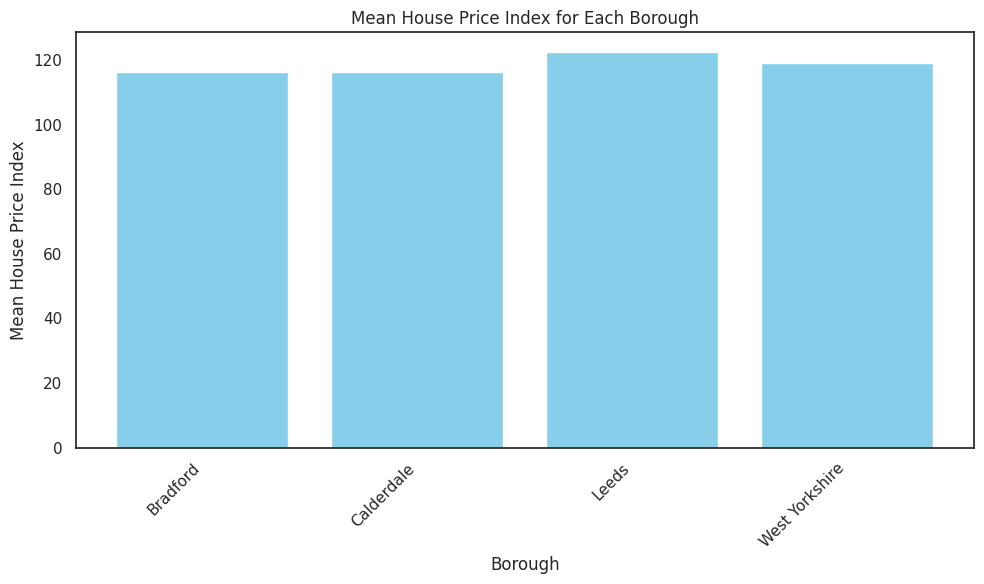

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(mean_house_price_index['Name'], mean_house_price_index['House price index All property types'], color='skyblue')
plt.title('Mean House Price Index for Each Borough')
plt.xlabel('Borough')
plt.ylabel('Mean House Price Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

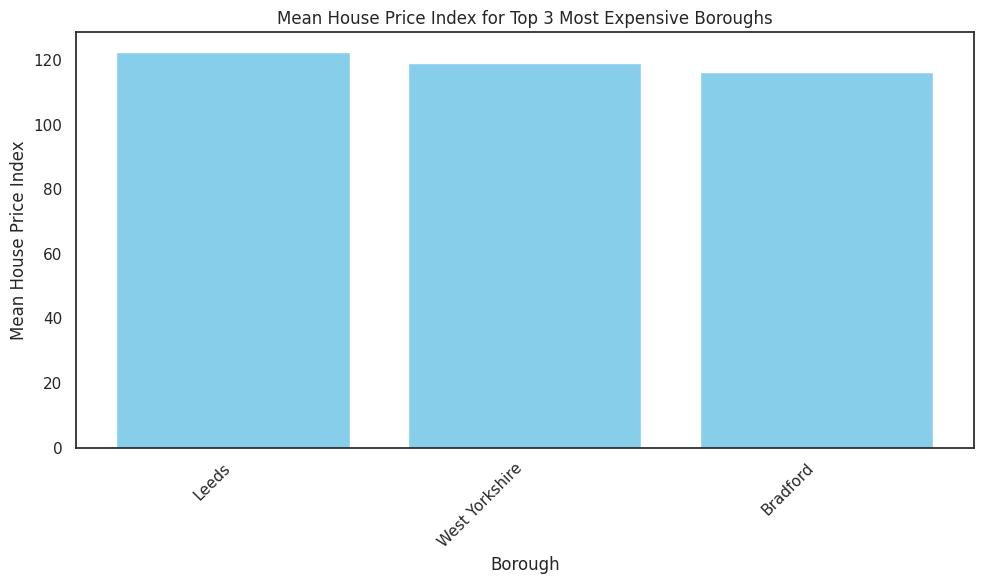

In [ ]:
# Calculate mean house price index for each borough
mean_house_price_index = df_clean.groupby('Name')['House price index All property types'].mean().reset_index()

# Sort the DataFrame by mean house price index in descending order
mean_house_price_index_sorted = mean_house_price_index.sort_values(by='House price index All property types', ascending=False)

# Select the top 3 most expensive boroughs
top_3_expensive = mean_house_price_index_sorted.head(3)

# Plot bar chart for top 3 most expensive boroughs
plt.figure(figsize=(10, 6))
plt.bar(top_3_expensive['Name'], top_3_expensive['House price index All property types'], color='skyblue')
plt.title('Mean House Price Index for Top 3 Most Expensive Boroughs')
plt.xlabel('Borough')
plt.ylabel('Mean House Price Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_clean.fillna(df_clean.mean(), inplace=True)

# Split the data into features (X) and target variable (y)
X = df_clean[['House price index All property types']]
y = df_clean['Sales volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1149122.5397131264


R-squared (R2) value: -0.4065235799547542


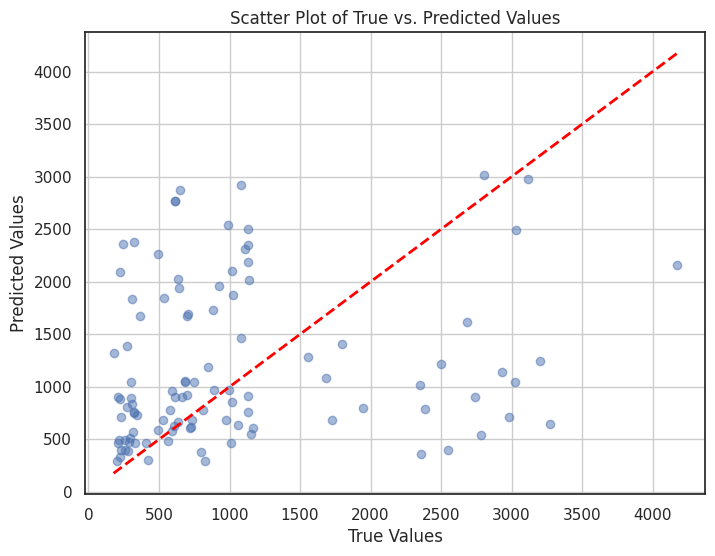

In [ ]:
r2 = r2_score(y_test, y_pred)
print('R-squared (R2) value:', r2)

# 2. Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Scatter Plot of True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# 3. Plot identity line
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--', linewidth=2)  # Identity line
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dissertation/ukhpi-comparison-all-hpi-bradford-from-2013-01-01-to-2029-01-01.csv')

In [ ]:
# Set 'Period' as the index of the DataFrame
df.set_index('Period', inplace=True)

# Sort the DataFrame by the index (which is now the 'Period')
df.sort_index(inplace=True)

# For simplicity, let's focus on predictions for the Bradford, Leeds, West Yorkshire, and Calderdale regions.
# We'll create separate DataFrames for each region.
bradford_df = df[df['Name'] == 'Bradford']
leeds_df = df[df['Name'] == 'Leeds']
west_yorkshire_df = df[df['Name'] == 'West Yorkshire']
calderdale_df = df[df['Name'] == 'Calderdale']

# Display the first few rows of each DataFrame to verify
print("Bradford DataFrame:")
print(bradford_df.head())

print("\nLeeds DataFrame:")
print(leeds_df.head())

print("\nWest Yorkshire DataFrame:")
print(west_yorkshire_df.head())

print("\nCalderdale DataFrame:")
print(calderdale_df.head())


Bradford DataFrame:
             Name                                                URI  \
Period                                                                 
2013-01  Bradford  http://landregistry.data.gov.uk/id/region/brad...   
2013-02  Bradford  http://landregistry.data.gov.uk/id/region/brad...   
2013-03  Bradford  http://landregistry.data.gov.uk/id/region/brad...   
2013-04  Bradford  http://landregistry.data.gov.uk/id/region/brad...   
2013-05  Bradford  http://landregistry.data.gov.uk/id/region/brad...   

        Region GSS code  Sales volume Reporting period  \
Period                                                   
2013-01       E08000032         301.0          monthly   
2013-02       E08000032         353.0          monthly   
2013-03       E08000032         410.0          monthly   
2013-04       E08000032         332.0          monthly   
2013-05       E08000032         476.0          monthly   

         House price index All property types Pivotable date  
Perio

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



current_year = pd.Timestamp('2024-01-01')

# Bradford
bradford_df = bradford_df[bradford_df.index < current_year]
X_bradford = np.array(bradford_df.index.year).reshape(-1, 1)
y_bradford = bradford_df['House price index All property types'].values
X_train_bradford, X_test_bradford, y_train_bradford, y_test_bradford = train_test_split(X_bradford, y_bradford, test_size=0.2, random_state=42)
model_bradford = RandomForestRegressor(random_state=42)
model_bradford.fit(X_train_bradford, y_train_bradford)
prediction_years = np.array(range(current_year.year, current_year.year + 6)).reshape(-1, 1)
predictions_bradford = model_bradford.predict(prediction_years)
prediction_df_bradford = pd.DataFrame({
    'Year': prediction_years.flatten(),
    'Predicted House Price Index (Bradford)': predictions_bradford
})

# Leeds
leeds_df = leeds_df[leeds_df.index < current_year]
X_leeds = np.array(leeds_df.index.year).reshape(-1, 1)
y_leeds = leeds_df['House price index All property types'].values
X_train_leeds, X_test_leeds, y_train_leeds, y_test_leeds = train_test_split(X_leeds, y_leeds, test_size=0.2, random_state=42)
model_leeds = RandomForestRegressor(random_state=42)
model_leeds.fit(X_train_leeds, y_train_leeds)
predictions_leeds = model_leeds.predict(prediction_years)
prediction_df_leeds = pd.DataFrame({
    'Year': prediction_years.flatten(),
    'Predicted House Price Index (Leeds)': predictions_leeds
})

# West Yorkshire
west_yorkshire_df = west_yorkshire_df[west_yorkshire_df.index < current_year]
X_west_yorkshire = np.array(west_yorkshire_df.index.year).reshape(-1, 1)
y_west_yorkshire = west_yorkshire_df['House price index All property types'].values
X_train_west_yorkshire, X_test_west_yorkshire, y_train_west_yorkshire, y_test_west_yorkshire = train_test_split(X_west_yorkshire, y_west_yorkshire, test_size=0.2, random_state=42)
model_west_yorkshire = RandomForestRegressor(random_state=42)
model_west_yorkshire.fit(X_train_west_yorkshire, y_train_west_yorkshire)
predictions_west_yorkshire = model_west_yorkshire.predict(prediction_years)
prediction_df_west_yorkshire = pd.DataFrame({
    'Year': prediction_years.flatten(),
    'Predicted House Price Index (West Yorkshire)': predictions_west_yorkshire
})

# Calderdale
calderdale_df = calderdale_df[calderdale_df.index < current_year]
X_calderdale = np.array(calderdale_df.index.year).reshape(-1, 1)
y_calderdale = calderdale_df['House price index All property types'].values
X_train_calderdale, X_test_calderdale, y_train_calderdale, y_test_calderdale = train_test_split(X_calderdale, y_calderdale, test_size=0.2, random_state=42)
model_calderdale = RandomForestRegressor(random_state=42)
model_calderdale.fit(X_train_calderdale, y_train_calderdale)
predictions_calderdale = model_calderdale.predict(prediction_years)
prediction_df_calderdale = pd.DataFrame({
    'Year': prediction_years.flatten(),
    'Predicted House Price Index (Calderdale)': predictions_calderdale
})

# Merging all prediction dataframes
prediction_df = prediction_df_bradford.merge(prediction_df_leeds, on='Year').merge(prediction_df_west_yorkshire, on='Year').merge(prediction_df_calderdale, on='Year')


prediction_df


,Year,Predicted House Price Index (Bradford),Predicted House Price Index (Leeds),Predicted House Price Index (West Yorkshire),Predicted House Price Index (Calderdale)
0,2024,144.723260,162.331805,153.806405,147.244925
1,2025,149.444694,168.952575,159.557512,152.423960
2,2026,154.166128,175.573346,165.308619,157.602996
3,2027,158.887563,182.194116,171.059725,162.782032
4,2028,163.608997,188.814886,176.810832,167.961067
5,2029,168.330431,195.435657,182.561939,173.140103


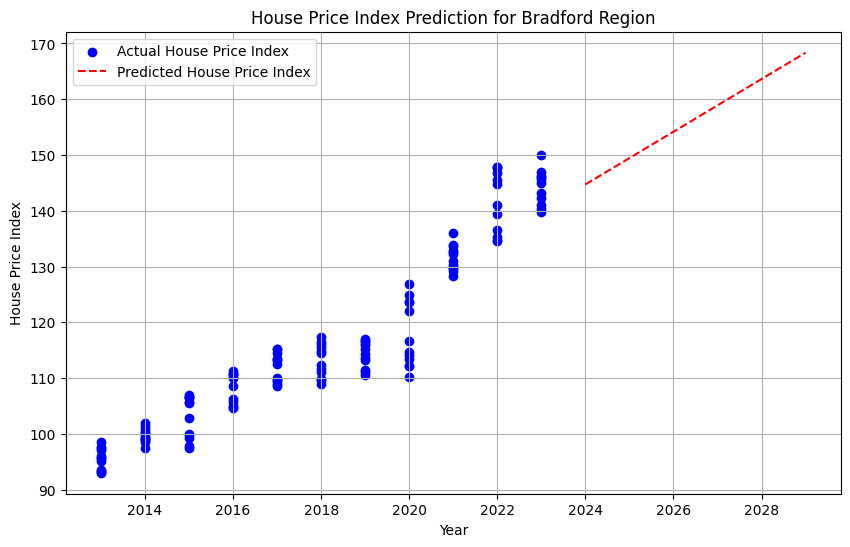

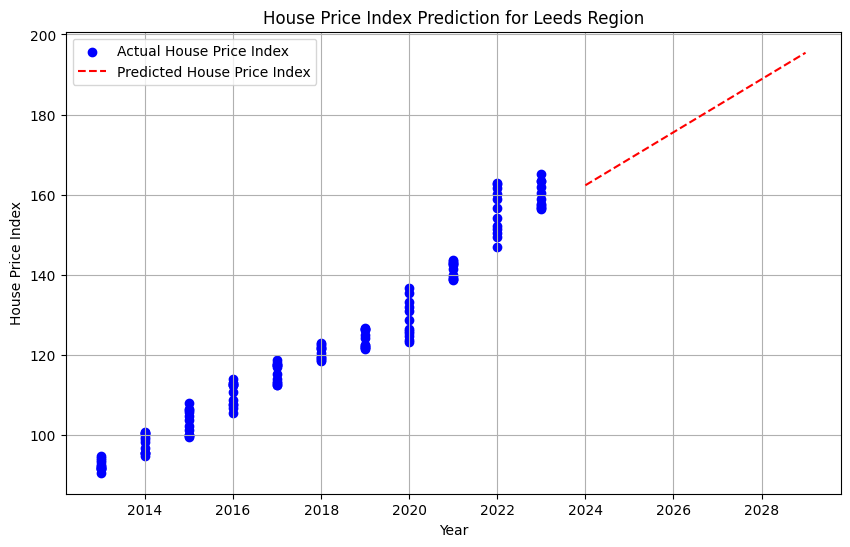

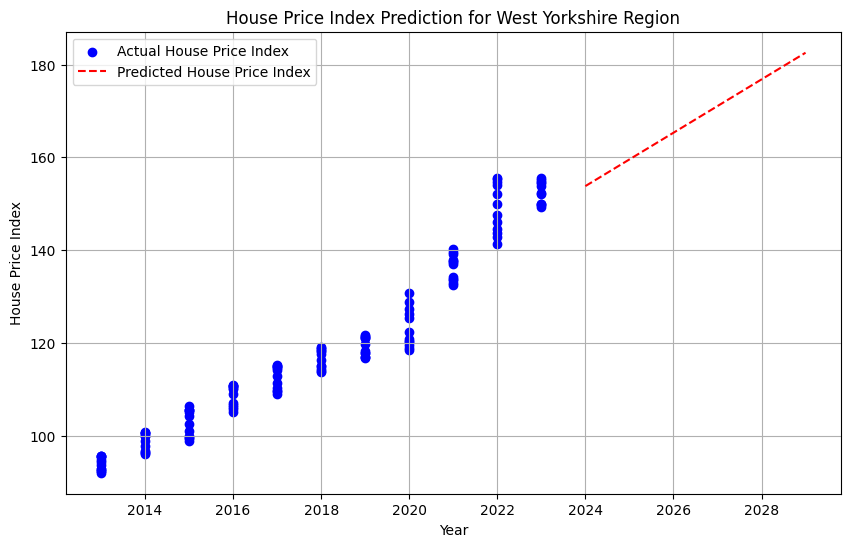

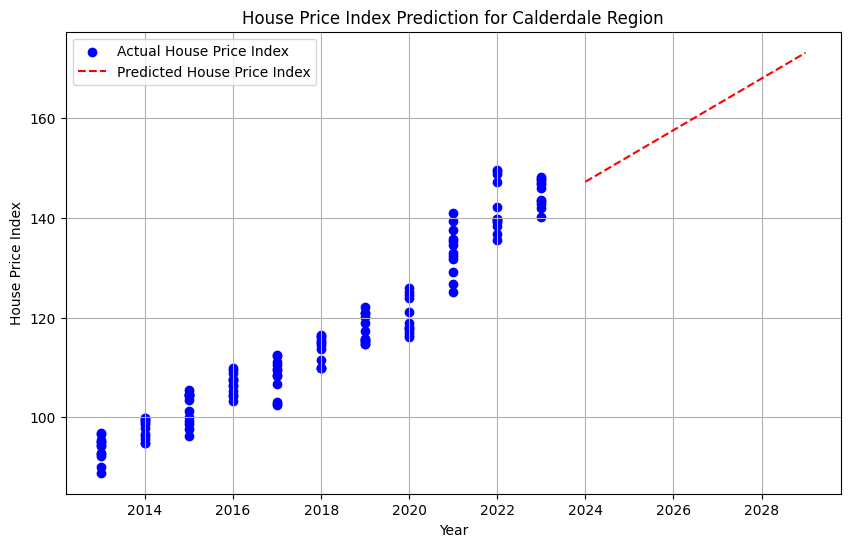

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Function to train Random Forest model and make predictions for each region
def train_and_predict_rf(df):
    X = np.array(df.index.year).reshape(-1, 1)
    y = df['House price index All property types'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest model
    model = RandomForestRegressor(random_state=42)

    # Fit the model
    model.fit(X_train, y_train)

    # Predict using our model for the next 5 years
    current_year = pd.Timestamp('2024-01-01')
    prediction_years = np.array(range(current_year.year, current_year.year + 6)).reshape(-1, 1)
    predictions = model.predict(prediction_years)

    return X, y, prediction_years, predictions, model

# Function to plot actual vs predicted sales volume
def plot_actual_vs_predicted(X, y, prediction_years, predictions, region):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Sales Volume')
    plt.plot(prediction_years, predictions, color='red', linestyle='--', label='Predicted Sales Volume')
    plt.title(f'Sales Volume Prediction for {region} Region')
    plt.xlabel('Year')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.grid(True)
    plt.show()

# Train Random Forest model and predict for each region and plot actual vs predicted sales volume
bradford_X, bradford_y, bradford_prediction_years, bradford_predictions, bradford_model = train_and_predict_rf(bradford_df)
leeds_X, leeds_y, leeds_prediction_years, leeds_predictions, leeds_model = train_and_predict_rf(leeds_df)
west_yorkshire_X, west_yorkshire_y, west_yorkshire_prediction_years, west_yorkshire_predictions, west_yorkshire_model = train_and_predict_rf(west_yorkshire_df)
calderdale_X, calderdale_y, calderdale_prediction_years, calderdale_predictions, calderdale_model = train_and_predict_rf(calderdale_df)

plot_actual_vs_predicted(bradford_X, bradford_y, bradford_prediction_years, bradford_predictions, 'Bradford')
plot_actual_vs_predicted(leeds_X, leeds_y, leeds_prediction_years, leeds_predictions, 'Leeds')
plot_actual_vs_predicted(west_yorkshire_X, west_yorkshire_y, west_yorkshire_prediction_years, west_yorkshire_predictions, 'West Yorkshire')
plot_actual_vs_predicted(calderdale_X, calderdale_y, calderdale_prediction_years, calderdale_predictions, 'Calderdale')


# Train and predict for each region and plot actual vs predicted sales volume
bradford_X, bradford_y, bradford_prediction_years, bradford_predictions = train_and_predict(bradford_df)
leeds_X, leeds_y, leeds_prediction_years, leeds_predictions = train_and_predict(leeds_df)
west_yorkshire_X, west_yorkshire_y, west_yorkshire_prediction_years, west_yorkshire_predictions = train_and_predict(west_yorkshire_df)
calderdale_X, calderdale_y, calderdale_prediction_years, calderdale_predictions = train_and_predict(calderdale_df)

plot_actual_vs_predicted(bradford_X, bradford_y, bradford_prediction_years, bradford_predictions, 'Bradford')
plot_actual_vs_predicted(leeds_X, leeds_y, leeds_prediction_years, leeds_predictions, 'Leeds')
plot_actual_vs_predicted(west_yorkshire_X, west_yorkshire_y, west_yorkshire_prediction_years, west_yorkshire_predictions, 'West Yorkshire')
plot_actual_vs_predicted(calderdale_X, calderdale_y, calderdale_prediction_years, calderdale_predictions, 'Calderdale')


In [ ]:
# Collect the maximum sales volume prediction for each region
max_sales_volume = max(
    max(bradford_predictions),
    max(leeds_predictions),
    max(west_yorkshire_predictions),
    max(calderdale_predictions)
)

# Find the region with the maximum sales volume
regions = ['Bradford', 'Leeds', 'West Yorkshire', 'Calderdale']
region_with_max_sales_volume = regions[np.argmax([max(bradford_predictions),
                                                  max(leeds_predictions),
                                                  max(west_yorkshire_predictions),
                                                  max(calderdale_predictions)])]

print(f"The region with the highest predicted sales volume in the future is: {region_with_max_sales_volume}")
print(f"The maximum predicted sales volume is: {max_sales_volume}")


The region with the highest predicted sales volume in the future is: Leeds
The maximum predicted sales volume is: 195.43565690190917


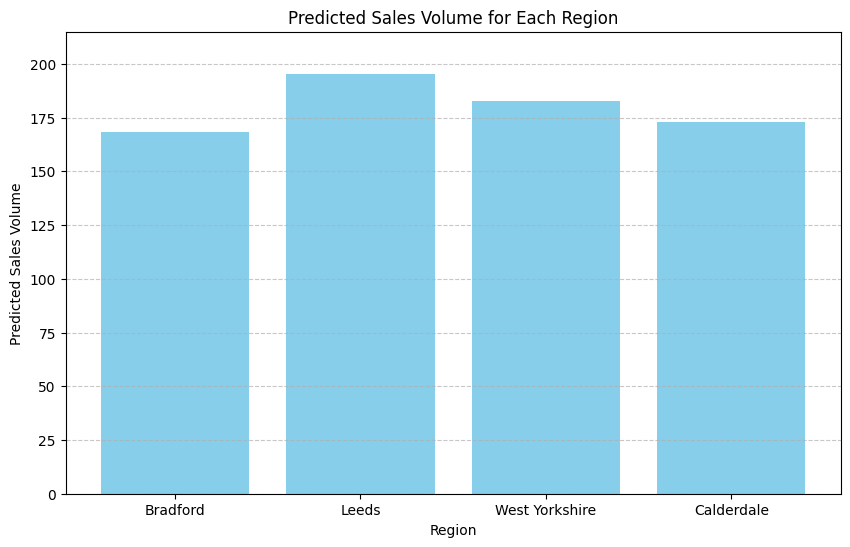

In [ ]:
import matplotlib.pyplot as plt

# Collect the maximum sales volume prediction for each region
max_sales_volume = max(
    max(bradford_predictions),
    max(leeds_predictions),
    max(west_yorkshire_predictions),
    max(calderdale_predictions)
)

# Find the region with the maximum sales volume
regions = ['Bradford', 'Leeds', 'West Yorkshire', 'Calderdale']
sales_volumes = [max(bradford_predictions),
                 max(leeds_predictions),
                 max(west_yorkshire_predictions),
                 max(calderdale_predictions)]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(regions, sales_volumes, color='skyblue')
plt.title('Predicted Sales Volume for Each Region')
plt.xlabel('Region')
plt.ylabel('Predicted Sales Volume')
plt.ylim(0, max_sales_volume * 1.1)  # Set y-axis limit to provide some padding
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
